torch.Size([80000, 1])
torch.Size([80000, 14])
torch.Size([80000, 2])
Initialized dataset torch.Size([17968, 128, 15]) torch.Size([17968, 128, 2])
[2025-09-21 13:52:31.969868] Current batch item: 0, took 217 ms, loss: 0.8025210499763489, mean loss: 0.8025210499763489
[2025-09-21 13:52:37.365839] Current batch item: 250, took 5395 ms, loss: 0.4309588670730591, mean loss: 0.616739958524704
[2025-09-21 13:52:42.759213] Current batch item: 500, took 5393 ms, loss: 0.2263493835926056, mean loss: 0.4866097668806712
1: RSQ: 0.6513198614120483, accuracy: 13.04%
[2025-09-21 13:52:44.520450] Current batch item: 0, took 21 ms, loss: 0.25386425852775574, mean loss: 0.25386425852775574
[2025-09-21 13:52:49.898892] Current batch item: 250, took 5378 ms, loss: 0.2269611805677414, mean loss: 0.24041271954774857
[2025-09-21 13:52:55.277813] Current batch item: 500, took 5378 ms, loss: 0.2508767545223236, mean loss: 0.24390073120594025
2: RSQ: 0.5710650086402893, accuracy: 12.62%
[2025-09-21 13:52:57.03

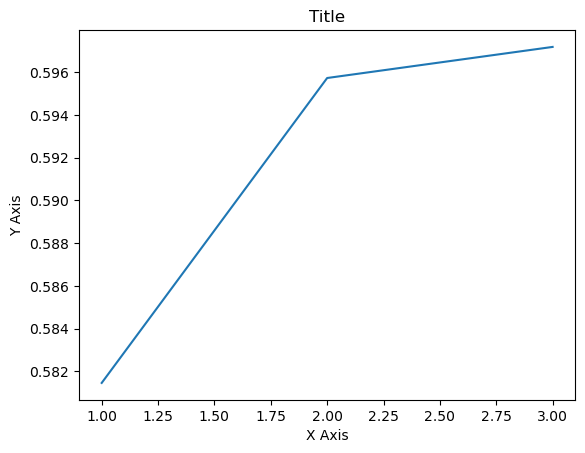

torch.Size([15996, 1])
Evaluation mode activated, created training items
torch.Size([15996]) torch.Size([15996, 15])


In [ ]:
from qch2025.pkg.models.RNN import network as network
from qch2025.pkg.models.RNN import func as func

from qch2025.pkg.dataset import DS

import qch2025.pkg.plotting as plt

import numpy as np
import pandas as pd
import torch
import datetime

n_epochs = 30
window_size = 64
batch_size = 32
window_steps = 32 # Minimize the overlap
attn_heads = 2

learning_rate = 0.0005
dropout = 0.05

r2_priority = 0.1

dtype = torch.float32

# Training
train_dataset = DS(dataset_path="/home/ubuntu/repos/quantchallenge-2025/qch2025/dataset/train.csv",
                        window_size=window_size,
                        window_steps=window_steps,
                        dtype=dtype)

rnn = network.RNN(15, 512, 2, dropout, attn_heads, 2, device=torch.device("cuda"), dtype=dtype)
losses = func.train(rnn, dataset=train_dataset, epochs=n_epochs, learning_rate=learning_rate, decay=r2_priority)

plt.plot_line(np.arange(1, len(losses)+1), losses)


checkpoint = torch.load("/home/ubuntu/repos/quantchallenge-2025/weights/weights.pth", weights_only=True)
rnn.load_state_dict(checkpoint['model_state_dict'])

eval = DS(dataset_path="/home/ubuntu/repos/quantchallenge-2025/qch2025/dataset/test.csv",
                    window_size=window_size,
                    window_steps=window_size,
                    eval=True,
                    device=torch.device("cuda"),
                    dtype=dtype)
y1, y2, ids = func.eval(rnn, eval, batch_size=32)

df = pd.DataFrame({"id": ids, "Y1": y1, "Y2": y2})
df["id"] = df["id"] + 1
df.to_csv(f"/home/ubuntu/repos/quantchallenge-2025/qch2025/outputs/{datetime.datetime.now()}_predicted.csv")






In [1]:
from qch2025.pkg.models.RNN import network as network
from qch2025.pkg.models.RNN import func as func

from qch2025.pkg.dataset import DS

import qch2025.pkg.plotting as plt

import numpy as np
import pandas as pd
import torch
import datetime

n_epochs = 30
window_size = 128
batch_size = 32
window_steps = 4
attn_heads = 2

learning_rate = 0.0005
dropout = 0.05

r2_priority = 0.1

dtype = torch.float32

rnn = network.RNN(15, 512, 2, dropout, attn_heads, 2, device=torch.device("cuda"), dtype=dtype)


checkpoint = torch.load("/home/ubuntu/repos/quantchallenge-2025/weights/weights.pth", weights_only=True)
rnn.load_state_dict(checkpoint['model_state_dict'])

eval = DS(dataset_path="/home/ubuntu/repos/quantchallenge-2025/qch2025/dataset/test.csv",
                    window_size=window_size,
                    window_steps=1,
                    eval=True,
                    device=torch.device("cuda"),
                    dtype=dtype)
print(eval.ids.shape, eval.train.shape)
y1, y2, ids = func.eval(rnn, eval)

df = pd.DataFrame({"id": ids, "Y1": y1, "Y2": y2})
df["id"] = df["id"] + 1
df.to_csv(f"/home/ubuntu/repos/quantchallenge-2025/qch2025/outputs/{datetime.datetime.now()}_predicted.csv")



torch.Size([15996, 1])
Evaluation mode activated, created training items
torch.Size([15996]) torch.Size([15996, 15])
